In [8]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR ='images/train'
TEST_DIR ='images/test'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [6]:
train=pd.DataFrame()
train['image'],train['label']=createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [9]:
test=pd.DataFrame()
test['image'],test['label']=createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [11]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,grayscale=True)
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features

In [19]:
train_features=extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Admin\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [20]:
test_features=extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [21]:
x_train =train_features/255.0
x_test=test_features/255.0

In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [25]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [26]:
y_train=to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [35]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [37]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'] )

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.6511 - loss: 0.9360 - val_accuracy: 0.6101 - val_loss: 1.0478
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.6482 - loss: 0.9452 - val_accuracy: 0.6202 - val_loss: 1.0461
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1437s 6s/step - accuracy: 0.6467 - loss: 0.9390 - val_accuracy: 0.6219 - val_loss: 1.0342
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.6445 - loss: 0.9362 - val_accuracy: 0.6214 - val_loss: 1.0322
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.6519 - loss: 0.9270 - val_accuracy: 0.6258 - val_loss: 1.0372
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.6490 - loss: 0.9297 - val_accuracy: 0.6228 - val_loss: 1.0297
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 971s 4s/step - accuracy: 0.6564 - loss: 0.9165 - val_accuracy: 0.6250 - val_loss: 1.0406
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.6593 - loss: 0.9167 -

226/226 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.7889 - loss: 0.6019 - val_accuracy: 0.6353 - val_loss: 1.0875
Epoch 100/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.7819 - loss: 0.6174 - val_accuracy: 0.6438 - val_loss: 1.0762


In [44]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [6]:
from keras.models import model_from_json

In [7]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [5]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']

In [15]:
def ef(image):
    img=load_img(image,grayscale=True)
    feature=np.array(img)
    feature=feature.reshape(1,48,48,1)
    return feature/255.0

In [16]:
image='images/train/happy/296.jpg'
print("original image is of HAPPY 😊 ")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of HAPPY 😊 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
model prediction is  happy


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of HAPPY 😊 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
model prediction is  happy


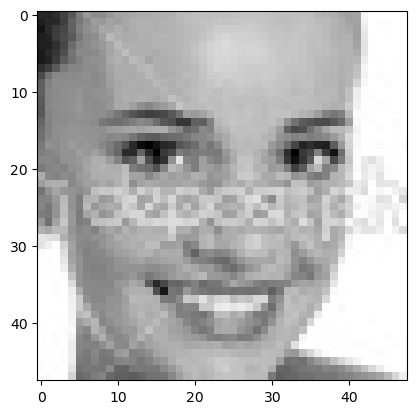

In [21]:
image='images/train/happy/296.jpg'
print("original image is of HAPPY 😊 ")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of SURPRISE 🤨  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
model prediction is  surprise


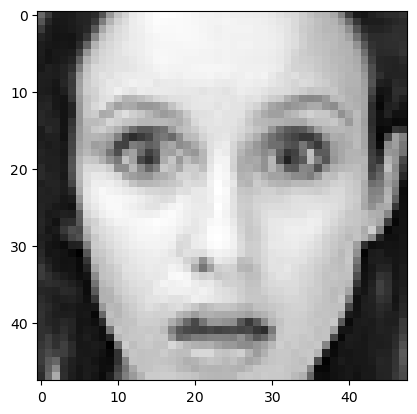

In [22]:
image='images/train/surprise/488.jpg'
print("original image is of SURPRISE 🤨  ")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of fear 😱
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
model prediction is  fear


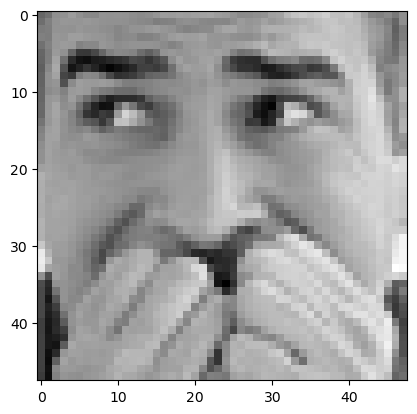

In [23]:
image='images/train/fear/190.jpg'
print("original image is of fear 😱")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of ANGRY 😡
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
model prediction is  angry


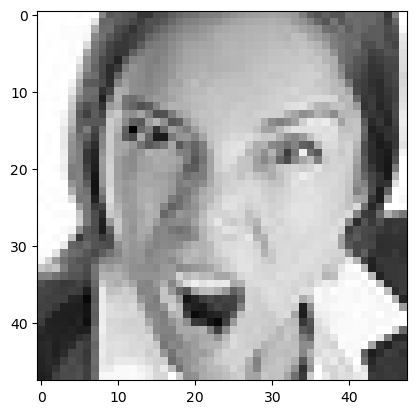

In [24]:
image='images/train/angry/412.jpg'
print("original image is of ANGRY 😡")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of DISGUST 🤢
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
model prediction is  disgust


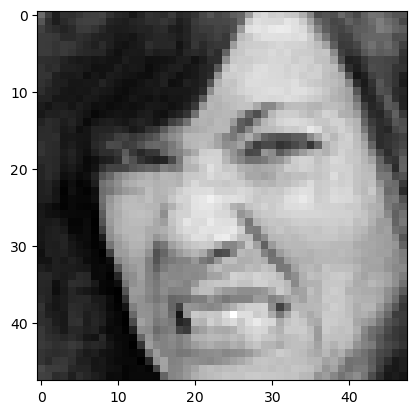

In [25]:
image='images/train/disgust/388.jpg'
print("original image is of DISGUST 🤢")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of SAD 😔
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
model prediction is  sad


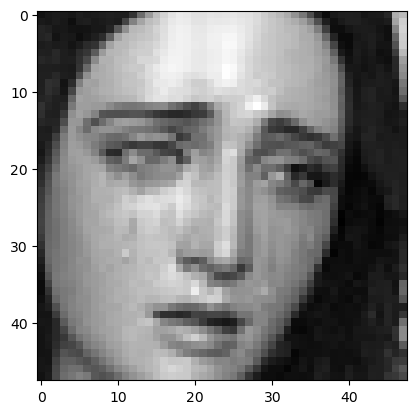

In [26]:
image='images/train/sad/159.jpg'
print("original image is of SAD 😔")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of NEUTRAL 😑 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
model prediction is  neutral


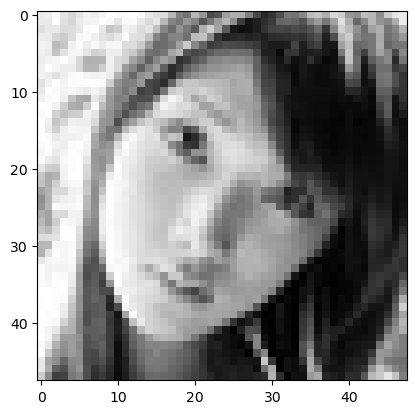

In [27]:
image='images/train/neutral/347.jpg'
print("original image is of NEUTRAL 😑 ")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Directory path for test data
test_data_dir = TEST_DIR

# Generate batches of image data with real-time data augmentation
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Get the true labels and predicted labels
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Classification report
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))


Found 7066 images belonging to 7 classes.


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 97s 437ms/step - accuracy: 0.5805 - loss: 1.2382
Test Accuracy: 64.38%
221/221 ━━━━━━━━━━━━━━━━━━━━ 111s 501ms/step
Classification Report
              precision    recall  f1-score   support

       angry       0.58      0.53      0.55       960
     disgust       0.82      0.59      0.69       111
        fear       0.60      0.38      0.46      1018
       happy       0.80      0.87      0.83      1825
     neutral       0.54      0.62      0.58      1216
         sad       0.49      0.58      0.53      1139
    surprise       0.79      0.75      0.77       797

    accuracy                           0.64      7066
   macro avg       0.66      0.62      0.63      7066
weighted avg       0.65      0.64      0.64      7066

Confusion Matrix
[[ 504    6   67   70  144  149   20]
 [  14   66    6    5    8    9    3]
 [ 113    2  385   58  145  236   79]
 [  40    1   17 1584   80   72   31]
 [  82    1   35  123  753  207   15]
 [ 100    3   79   72  219  6